In [77]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# load libraries
from sklearn import datasets

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.svm import SVC, SVR

import matplotlib.pyplot as plt    
import seaborn as sns
plt.style.use('ggplot')



## SVM as Classification Model

In [82]:
cancer = datasets.load_breast_cancer()
print(cancer.keys())

cancerdata = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
cancerdata.head(5)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
cancerdata.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


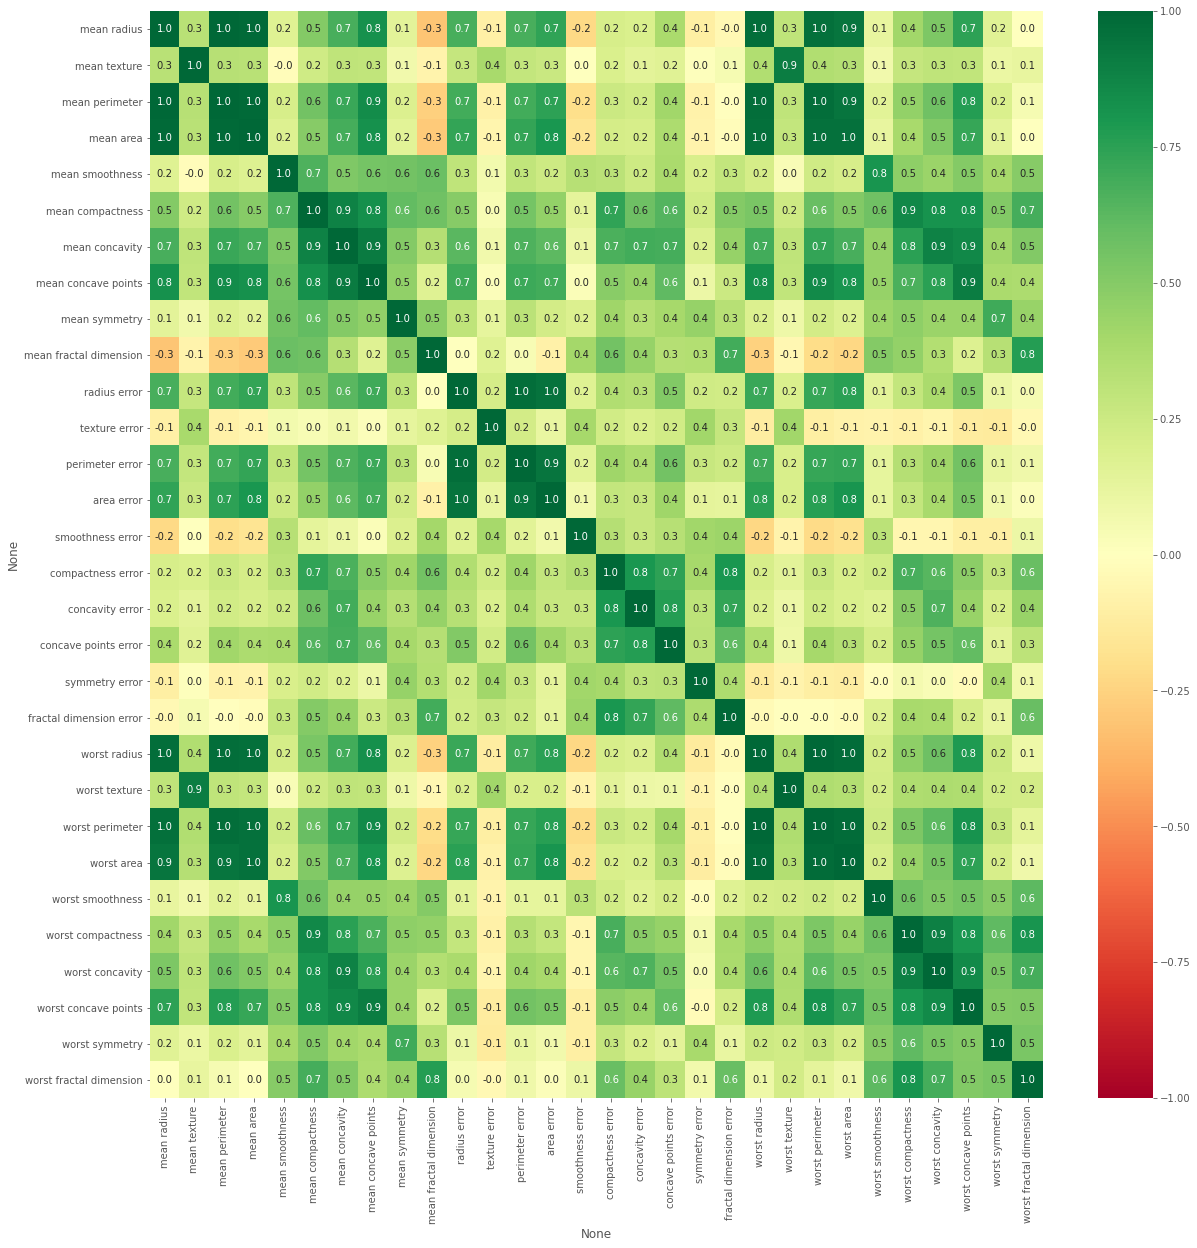

In [98]:
corr = cancerdata.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,fmt='.1f',annot=True,cmap='RdYlGn',vmin=-1,vmax=1)


SVC(random_state=85)

Cross Validation Accuracies: [0.98102467 0.94560405 0.97712418 0.97973856 0.98235294 0.95620915
 0.99150327]

Mean Cross Validation Accuracy: 0.9733652600825277

Stdev of Cross Validation Accuracies: 0.015062715296229335

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        55
           1       0.89      1.00      0.94        88

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143


[[44 11]
 [ 0 88]]


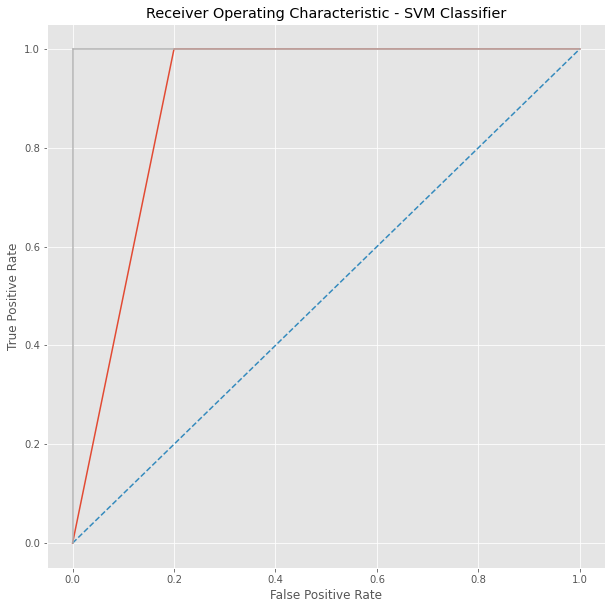

In [53]:
# load the iris datasets
dataset = datasets.load_breast_cancer()
X = dataset.data; y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=85)

# fit a SVM model to the data
model = SVC(random_state=85)
model.fit(X_train, y_train)
print(); print(model)

# Cross-validate model using accuracy
print(); print("Cross Validation Accuracies:",cross_val_score(model, X, y, scoring="roc_auc", cv = 7))
mean_score = cross_val_score(model, X, y, scoring="roc_auc", cv = 7).mean()
std_score = cross_val_score(model, X, y, scoring="roc_auc", cv = 7).std()
print(); print("Mean Cross Validation Accuracy:",mean_score)
print(); print("Stdev of Cross Validation Accuracies:",std_score)

# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(expected_y, predicted_y)

# Plot ROC curves
plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - SVM Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




## SVM as Regression Model

In [94]:
boston = datasets.load_boston()
print(boston.keys())

bostondata = pd.DataFrame(boston.data, columns=[boston.feature_names])
bostondata.head(5)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


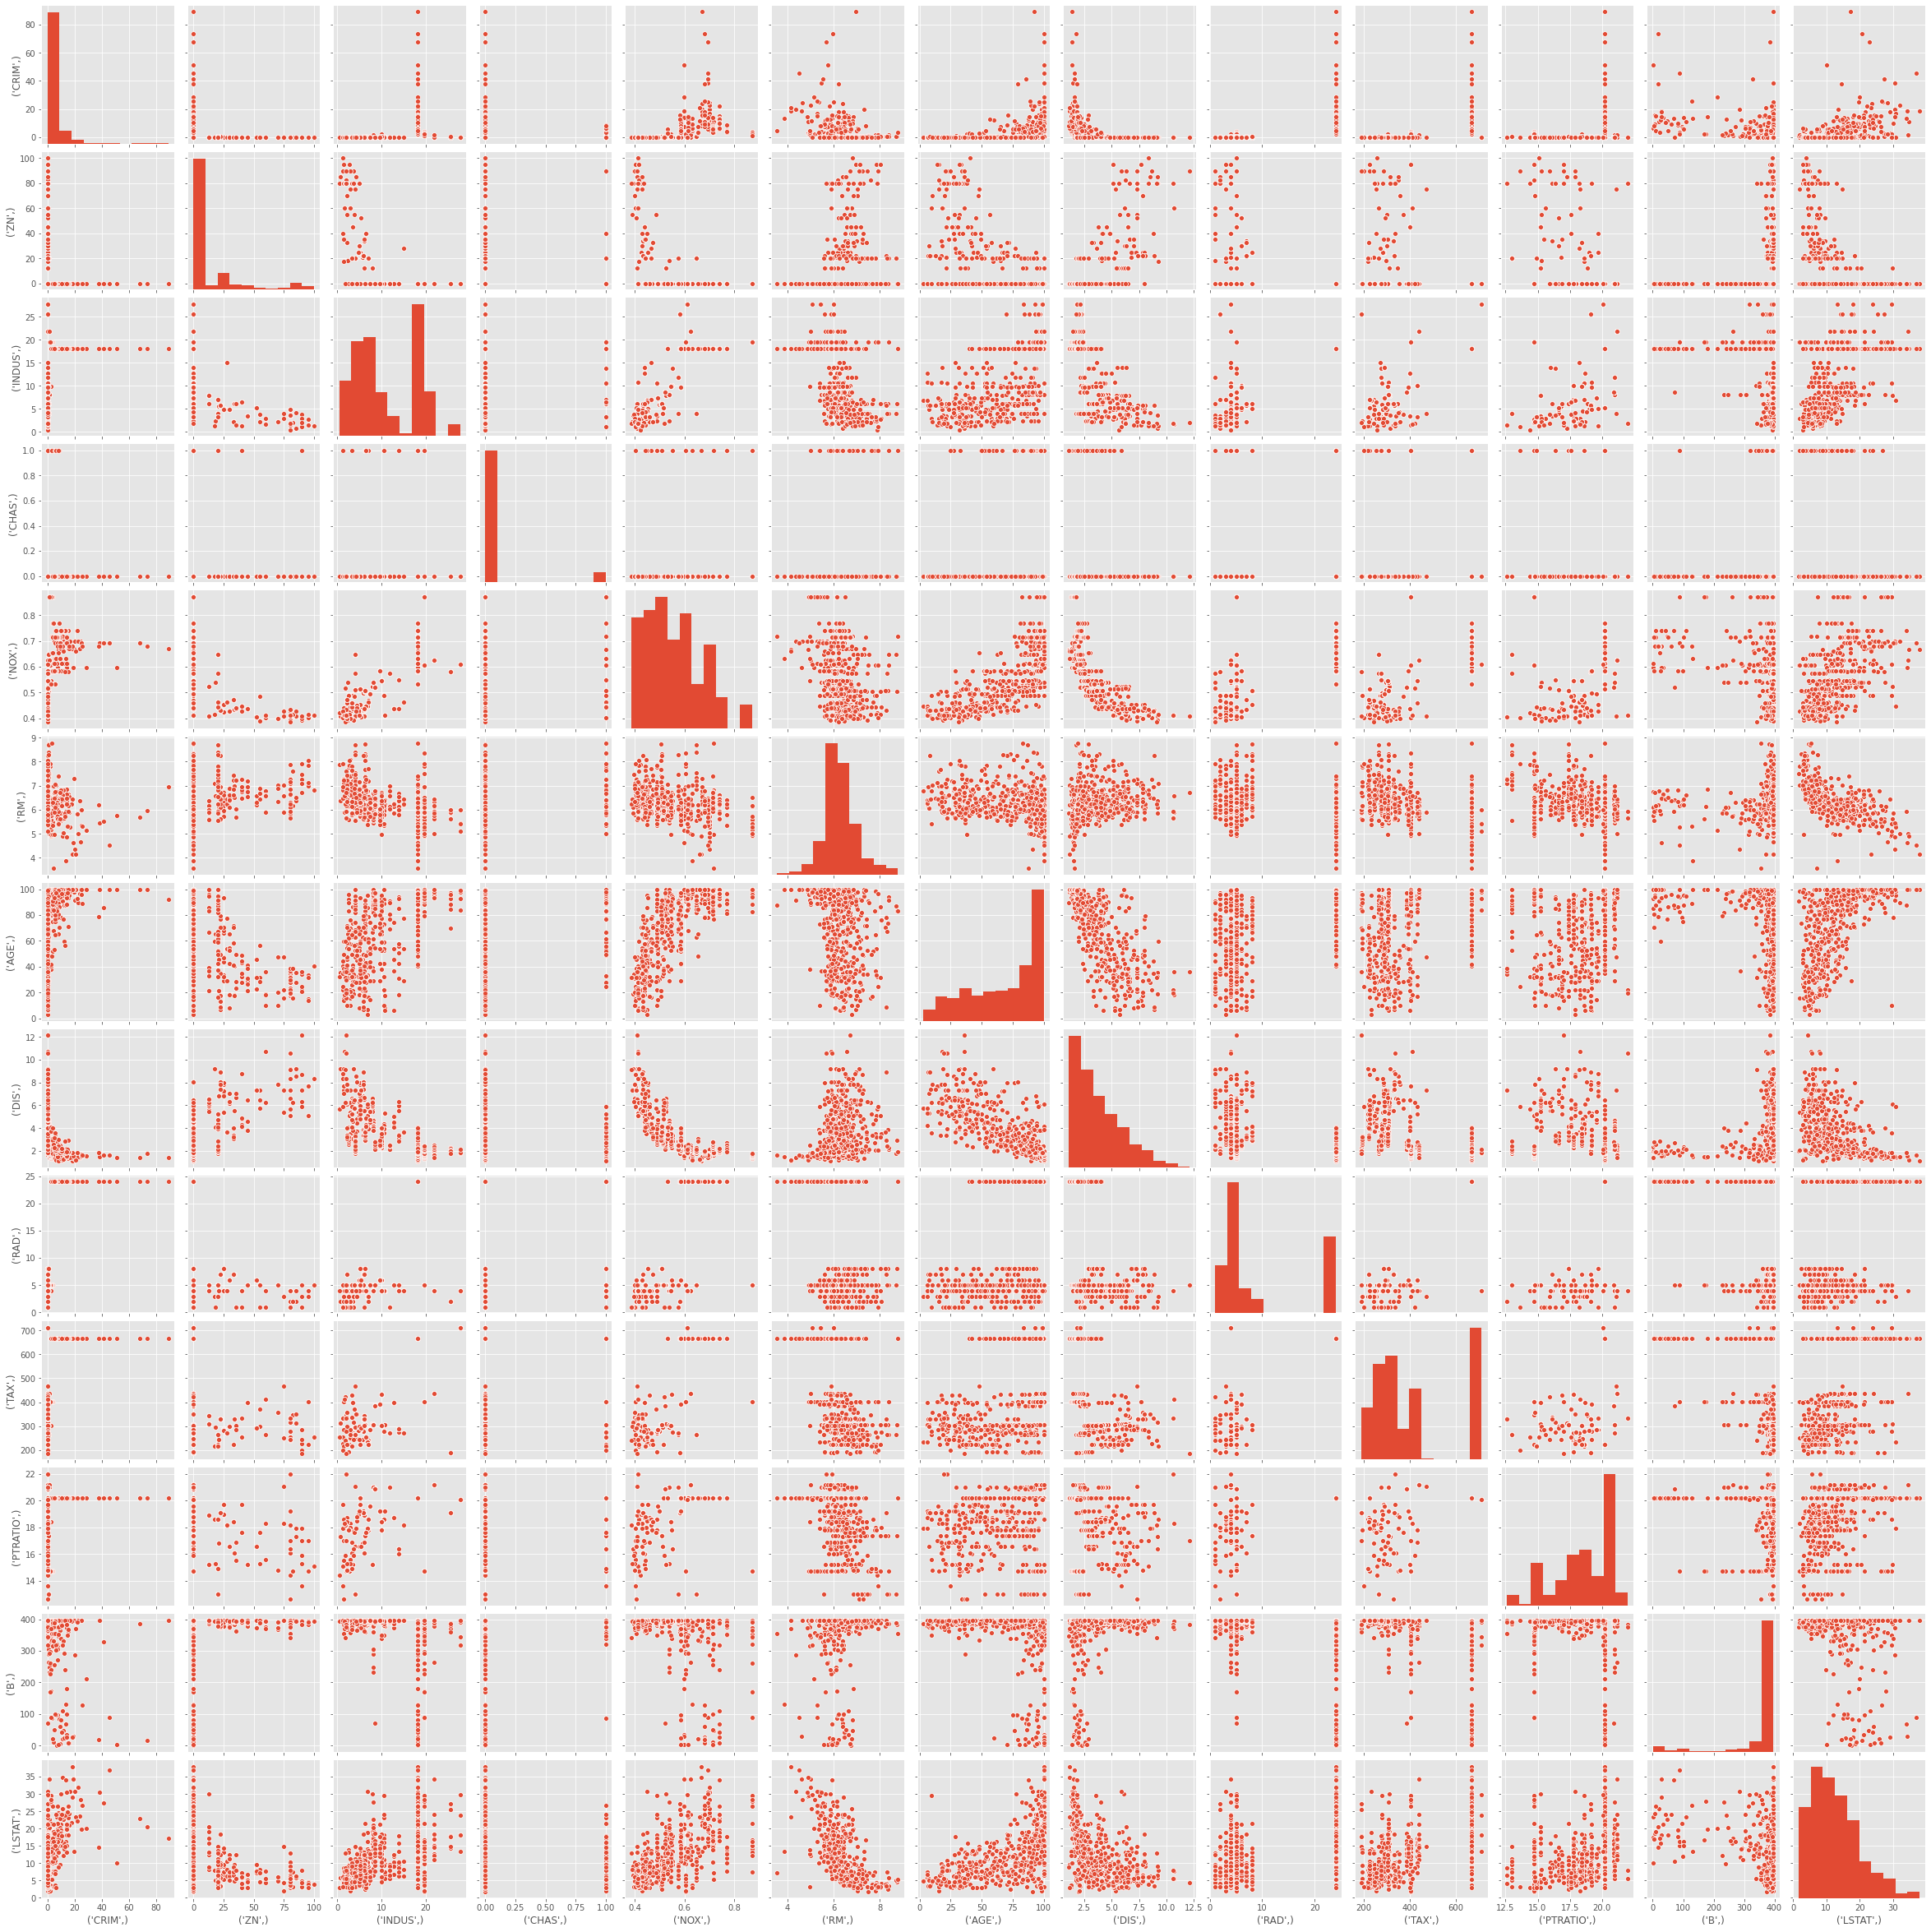

In [97]:
sns.pairplot(bostondata)

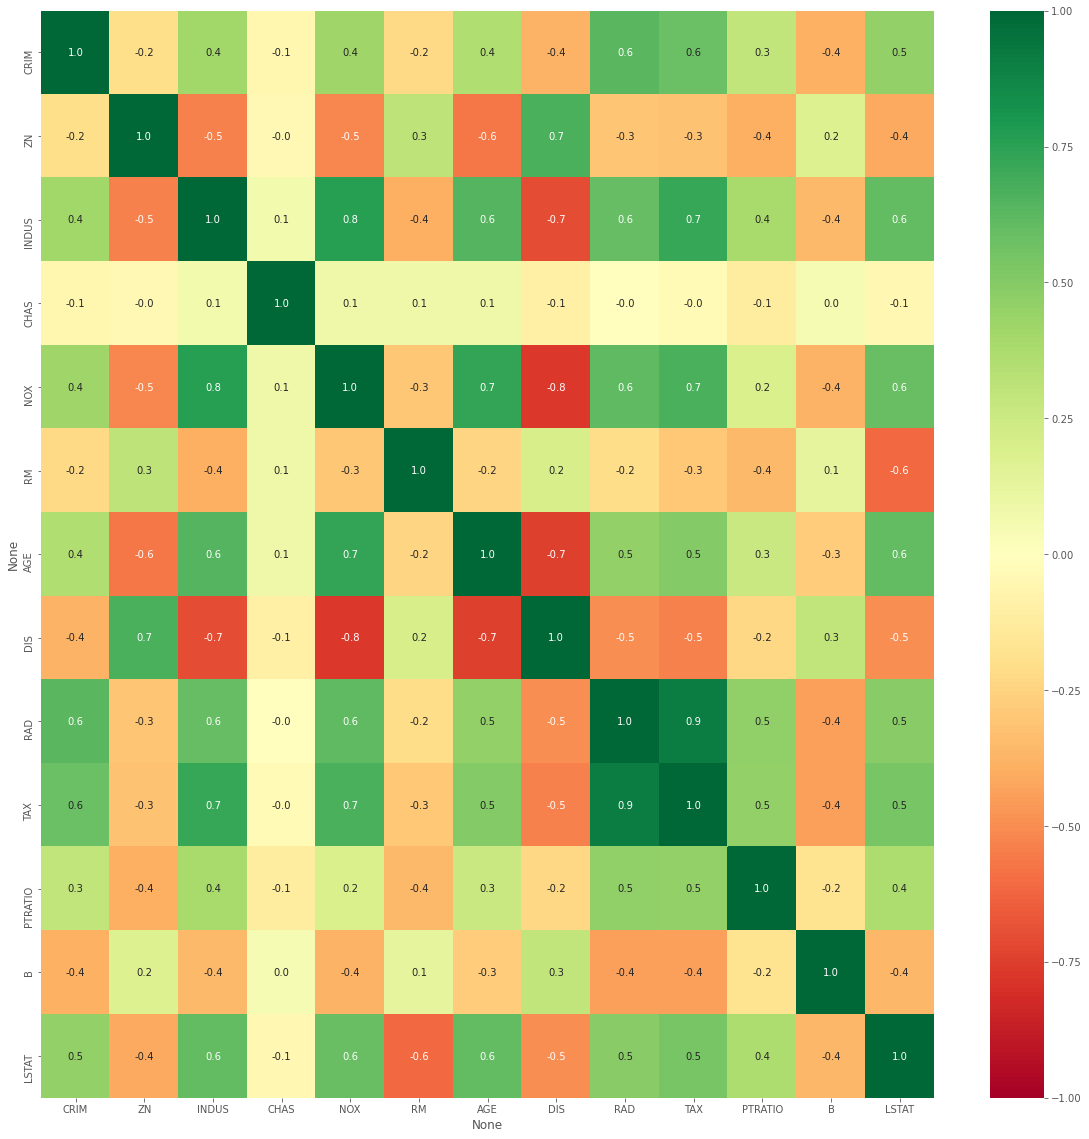

In [96]:
corr = bostondata.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,fmt='.1f',annot=True,cmap='RdYlGn',vmin=-1,vmax=1)


SVR()

0.2431738270083661

0.09912974667180169


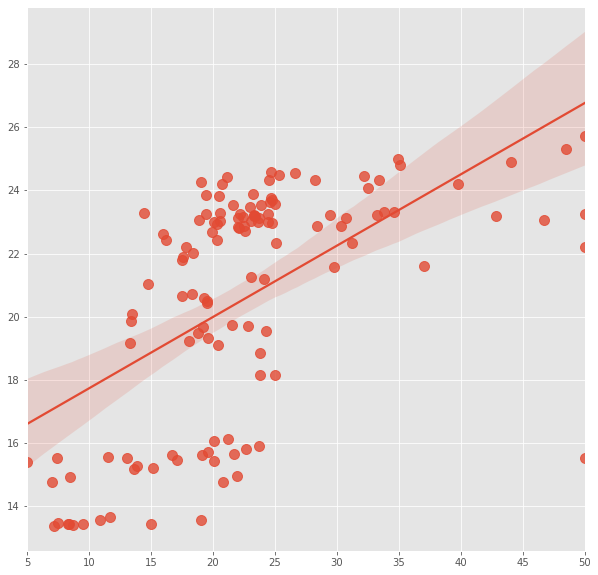

In [71]:
# load the boston datasets
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=85)    

# fit a SVM model to the data
model = SVR()
model.fit(X_train, y_train)
print(); print(model)

# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_log_error(expected_y, predicted_y))
plt.figure(figsize=(10,10))             
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})